# Visualizacion Humedad

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scripts.data as data

analysis_data = data.load_analysis_data()
humidity = analysis_data.filter(regex="Hum")
humidity.head()

,,HumMin,HumMax,HumMean
Year,Month,,,
1991,Enero,21.0,99.0,NaN
1992,Enero,32.0,100.0,NaN
1993,Enero,25.0,99.0,NaN
1994,Enero,26.0,99.0,NaN
1995,Enero,21.0,99.0,NaN


### Evolución de la Humedad Promedio

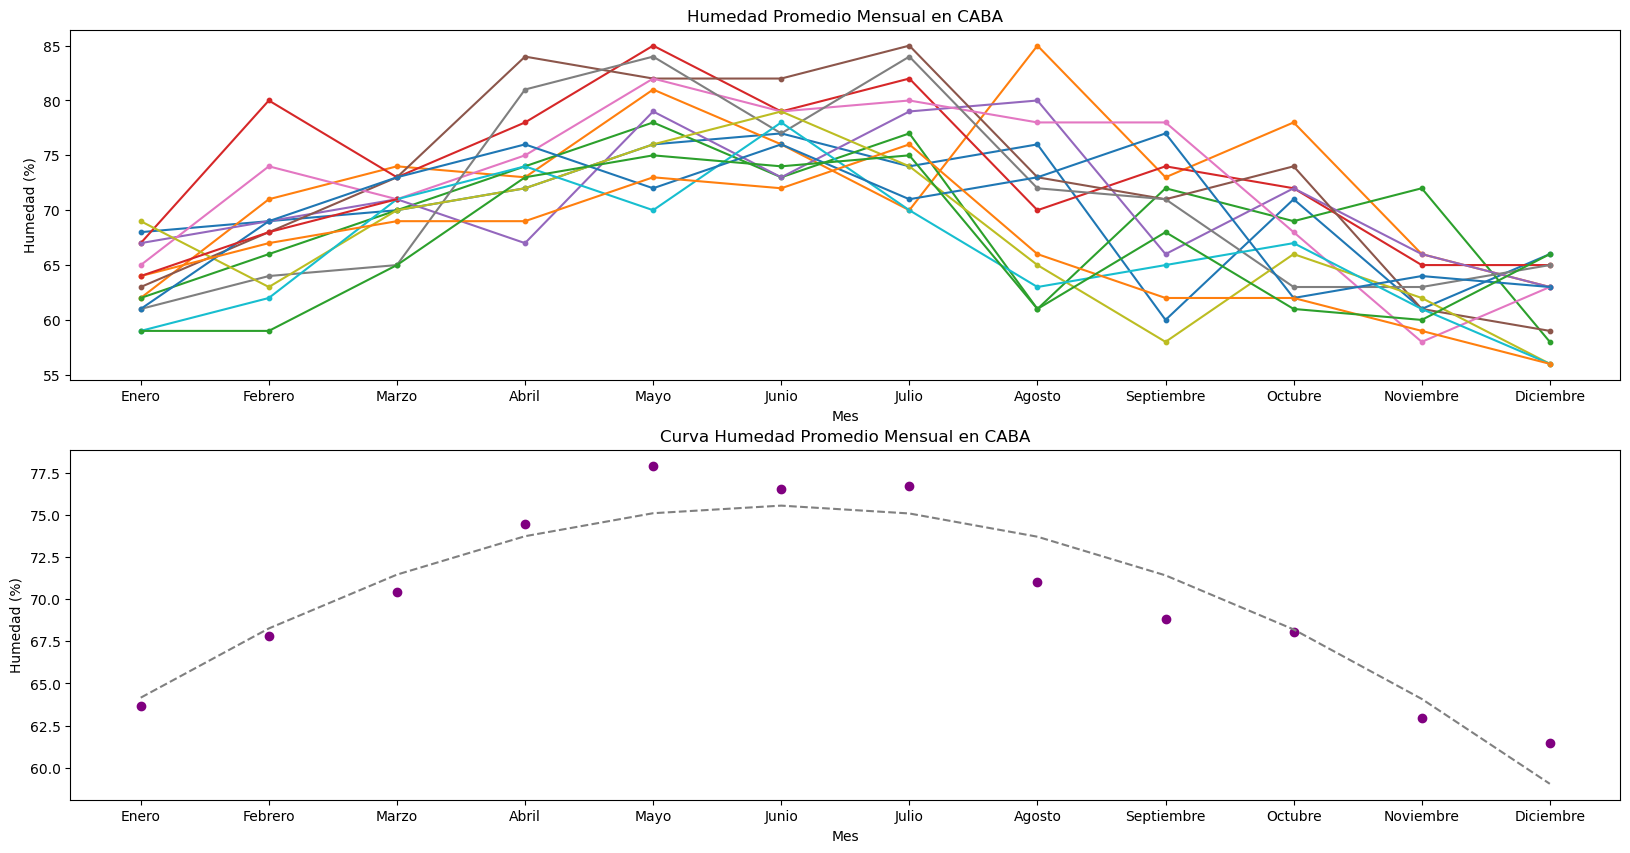

In [3]:
fig, axis = plt.subplots(2, 1)
fig.set_size_inches(20, 10)

axis[0].set_title("Humedad Promedio Mensual en CABA")
axis[0].set_ylabel("Humedad (%)")
axis[0].set_xlabel("Mes")

means = pd.DataFrame(humidity["HumMean"]).dropna()
for year, hum in means.groupby("Year"):
    months = hum.index.get_level_values(1)
    axis[0].plot(months, hum["HumMean"], label=year)
    axis[0].scatter(months, hum["HumMean"], s=10)

axis[1].set_title("Curva Humedad Promedio Mensual en CABA")
axis[1].set_ylabel("Humedad (%)")
axis[1].set_xlabel("Mes")

months = means.index.get_level_values(1).unique()
mean_avg = means.groupby("Month").mean().reindex(months)
axis[1].scatter(months, mean_avg["HumMean"], color="purple")

regression = np.poly1d(reg_coef)
axis[1].plot(months, regression(range(1, 13)), linestyle="--", color="gray")

plt.show()

Del gráfico, podemos observar cómo la humedad promedio encuentra su punto máximo en los meses de menor temperatura.